In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train = pd.read_csv('sephora_train_data.csv')
test = pd.read_csv('sephora_test_data.csv')
train.head()

,Unnamed: 0,product_url,overall_ratings,is_vegan,is_cruelty_free,award_wins,is_clean_product,has_clinical_results,has_alcohol,price,...,dark_spots_skincare_concerns,targets_signs_of_aging_skincare_concerns,puffiness_skincare_concerns,lightweight_liquid_skincare_concerns,uneven_texture_skincare_concerns,redness_skincare_concerns,oiliness_skincare_concerns,makeup_removal_skincare_concerns,pores_skincare_concerns,from_famous_brand
0,0,https://www.sephora.com/product/biossance-squa...,4.0,1,1,0,1,0,1,28.0,...,0,0,0,0,1,0,0,0,1,0
1,1,https://www.sephora.com/product/anti-aging-cle...,4.5,0,0,0,0,1,0,39.0,...,0,0,0,0,1,0,0,0,0,0
2,2,https://www.sephora.com/product/clarifying-cle...,4.0,0,1,0,1,0,1,72.0,...,0,0,0,0,0,0,1,0,1,0
3,3,https://www.sephora.com/product/mario-badescu-...,4.0,0,1,0,0,0,1,18.0,...,0,0,0,0,1,0,0,0,0,1
4,4,https://www.sephora.com/product/clean-bee-ultr...,4.0,0,1,0,1,0,1,28.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
train['>4s'] = train['overall_ratings'].apply(lambda x: int(x>4))
test['>4s'] = test['overall_ratings'].apply(lambda x: int(x>4))

# Binary Binning

In [4]:
#### Creates the training set to train our regression model on
y_train_orig = train['>4s']
X_train_orig = train.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)

Xtest = test.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)
ytest = test['>4s']

X_train, X_test, y_train, y_test = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=404)
X_train.shape, X_test.shape

((658, 31), (282, 31))

In [12]:
grid_values = {'max_features': np.linspace(1,30,8, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': [5, 10, 15, 20],
               'n_estimators': [500],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([ 1,  5,  9, 13, 17, 21, 25, 30]),
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

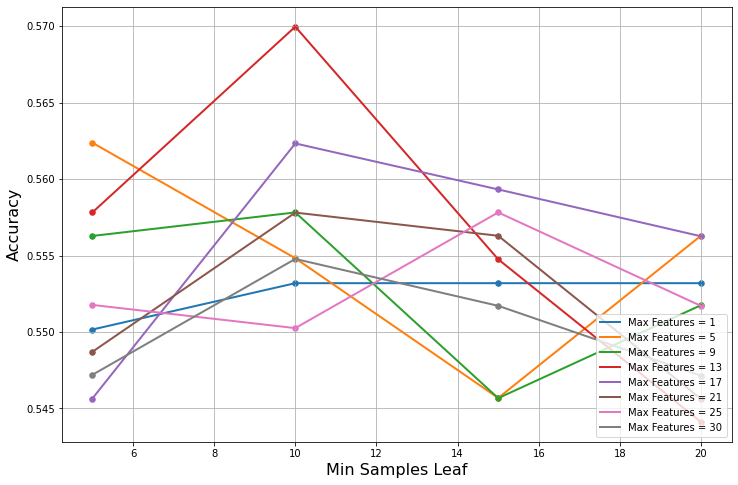

In [24]:
n_estimators = rf_cv.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

We can see from above that there isn't much use in going further with min sample leaf past 15. We can also see that having more features can be detrimental aswell. However, our best model has 13 features, so I will be exploring more into that graphical region to better select a model for the final product.

In [40]:
grid_values = {'max_features': np.linspace(10,15,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(1,15,15, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([10, 11, 12, 13, 15]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

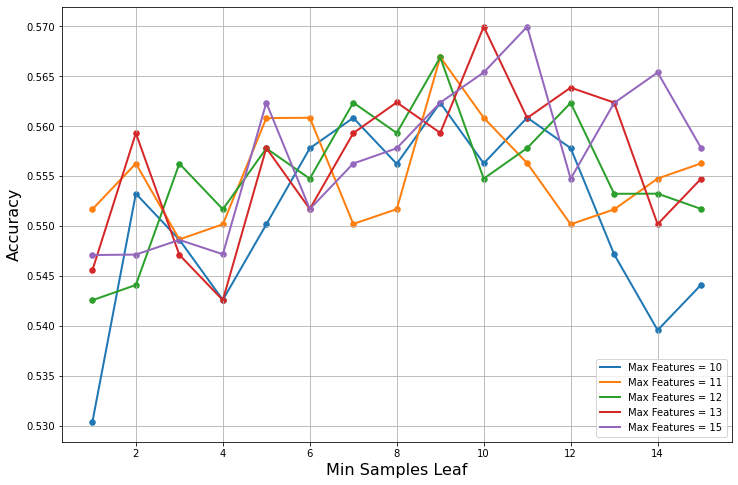

In [41]:
n_estimators = rf_cv.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [195]:
grid_values = {'max_features': [15],
               'max_depth': [5, 10, 15, 20, 25],
               'min_samples_leaf': [11],
               'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25], 'max_features': [15],
                         'min_samples_leaf': [11],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900],
                         'random_state': [404]},
             scoring='accuracy')

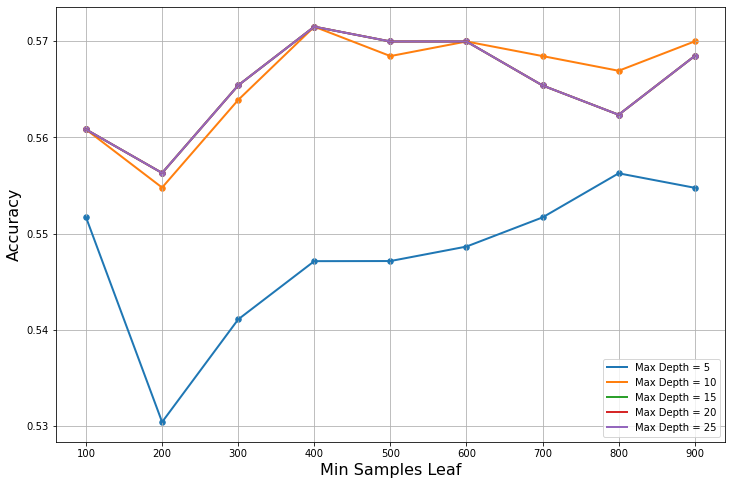

In [196]:
n_estimators = rf_cv.cv_results_['param_n_estimators'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['n_estimators'])
N = len(grid_values['max_depth'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Depth = '+str(grid_values['max_depth'][i]))
plt.legend(loc='lower right')
plt.show()

In [205]:
rf = RandomForestClassifier(random_state = 404, n_estimators = 400, max_features = 15, max_depth = 10, min_samples_leaf = 11)
rf.fit(X_train_orig, y_train_orig)

RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=11,
                       n_estimators=400, random_state=404)

In [206]:
y_pred = rf.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, y_pred))

Confusion Matrix: 
 [[60 60]
 [26 90]]

Accuracy: 0.635593220338983


# Binning according to rating (RF)

Creating the bins by changing the results to categories -- This is done by converting the overalls to categories.

In [44]:
def multi_bin(dataset):
    solution = np.zeros([(len(dataset)), 11])
    for i, j in enumerate(dataset):
        solution[i][int(j*2)] = 1
    return solution

In [45]:
y_multitrain = multi_bin(train['overall_ratings'].values)
y_multitest = multi_bin(test['overall_ratings'].values)

In [46]:
y_multitrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [47]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_train_orig, y_multitrain,
                                                                            test_size=0.3, random_state=404)
X_train.shape, X_test.shape

((658, 31), (282, 31))

In [48]:
grid_values = {'max_features': np.linspace(1,30,8, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': [5, 10, 15, 20],
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([ 1,  5,  9, 13, 17, 21, 25, 30]),
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

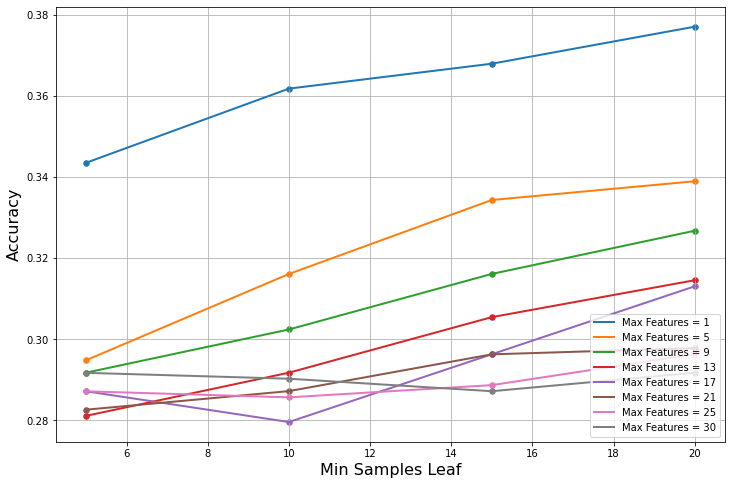

In [50]:
n_estimators = rf_cv_multi.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [55]:
grid_values = {'max_features': np.linspace(1,5,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(20,50,7, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([20, 25, 30, 35, 40, 45, 50]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

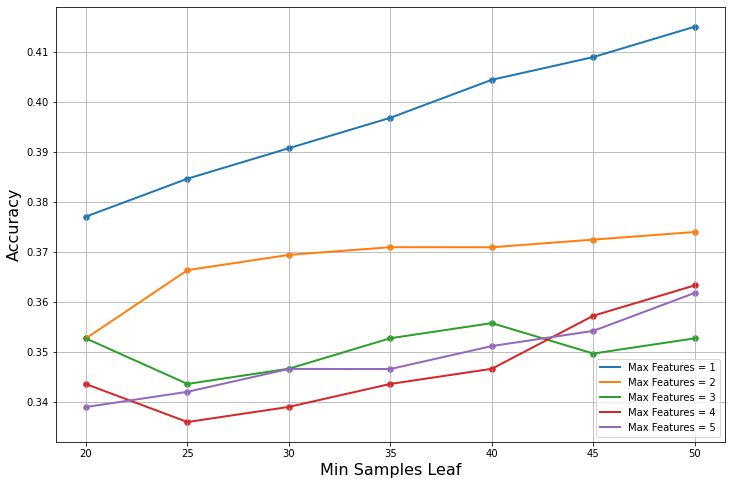

In [56]:
n_estimators = rf_cv_multi.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [57]:
grid_values = {'max_features': np.linspace(1,5,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(50,80,7, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([50, 55, 60, 65, 70, 75, 80]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

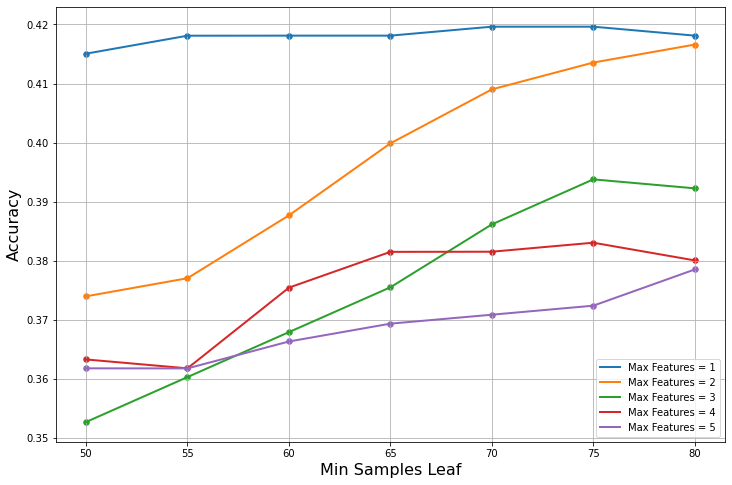

In [58]:
n_estimators = rf_cv_multi.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [59]:
grid_values = {'max_features': np.linspace(1,5,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(80,110,7, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([ 80,  85,  90,  95, 100, 105, 110]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

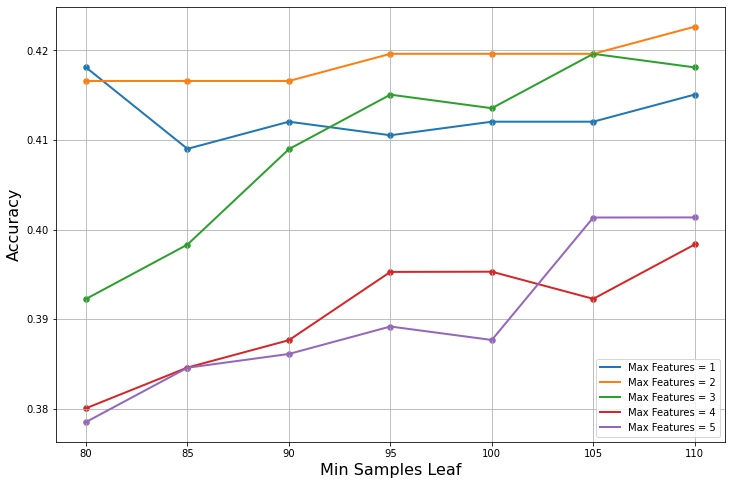

In [60]:
n_estimators = rf_cv_multi.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [61]:
grid_values = {'max_features': np.linspace(1,5,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(110,140,7, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([110, 115, 120, 125, 130, 135, 140]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='accuracy')

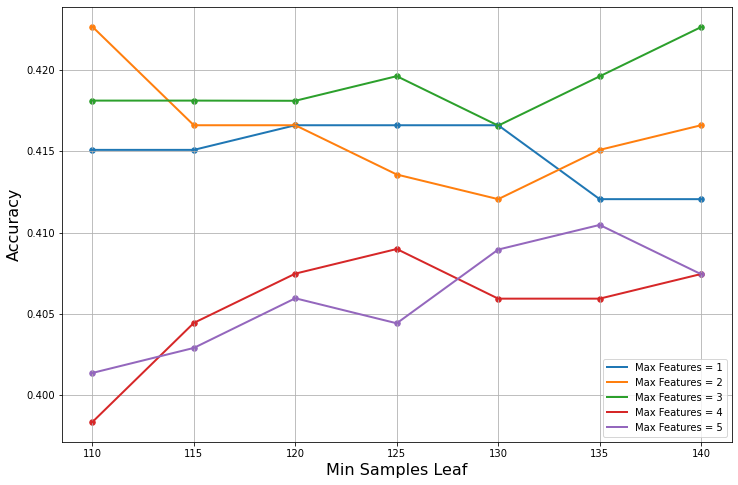

In [62]:
n_estimators = rf_cv_multi.cv_results_['param_min_samples_leaf'].data
R2_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='lower right')
plt.show()

In [66]:
rf_multi = RandomForestClassifier(random_state = 404, n_estimators = 500, max_features = 1, max_depth = 20, min_samples_leaf = 20)
rf_multi.fit(X_train_orig, y_multitrain)

RandomForestClassifier(max_depth=20, max_features=1, min_samples_leaf=20,
                       n_estimators=500, random_state=404)

In [67]:
y_pred = rf_multi.predict(Xtest)
counter = 0
for i, j in enumerate(y_pred):
    if sum(y_pred[i]) < 1:
        y_pred[i] = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
        counter += 1
print('proportion of all 0s', counter/len(y_pred))
#cm = confusion_matrix(y_multitest, y_pred)
#print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_multitest, y_pred))

proportion of all 0s 0.9576271186440678

Accuracy: 0.4449152542372881


Model cannot predict, guesses baseline only.

# Switching to regression

In [133]:
grid_values = {'max_features': np.linspace(1,30,7, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': [5, 10, 15, 20],
               'n_estimators': [500],
               'random_state': [404]}

rf_reg = RandomForestClassifier() 
rf_cv_reg = GridSearchCV(rf_multi, param_grid=grid_values, scoring='neg_mean_absolute_error',
                           cv=5)
rf_cv_reg.fit(X_train, y_train_multi)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=1,
                                              min_samples_leaf=20,
                                              n_estimators=500,
                                              random_state=404),
             param_grid={'max_depth': [20],
                         'max_features': array([ 1,  5, 10, 15, 20, 25, 30]),
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [500], 'random_state': [404]},
             scoring='neg_mean_absolute_error')

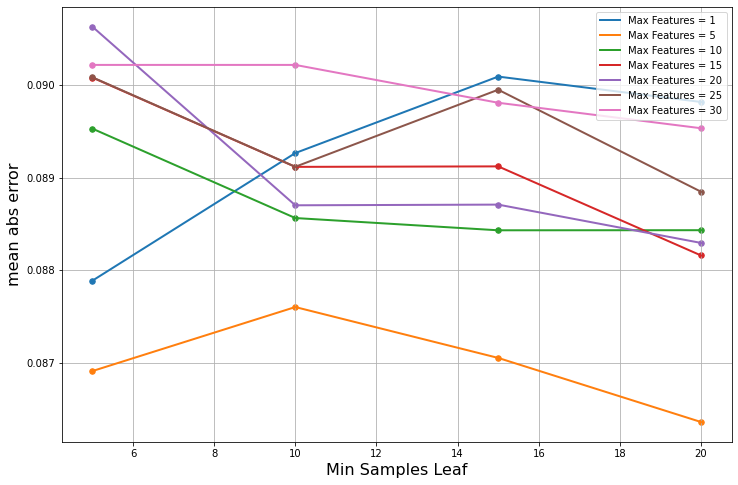

In [136]:
n_estimators = rf_cv_reg.cv_results_['param_min_samples_leaf'].data
R2_scores = -rf_cv_reg.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('mean abs error', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='upper right')
plt.show()

In [137]:
grid_values = {'max_features': np.linspace(1,5,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(20,50,7, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_reg = RandomForestClassifier() 
rf_cv_reg = GridSearchCV(rf_multi, param_grid=grid_values, scoring='neg_mean_absolute_error',
                           cv=5)
rf_cv_reg.fit(X_train, y_train_multi)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=1,
                                              min_samples_leaf=20,
                                              n_estimators=500,
                                              random_state=404),
             param_grid={'max_depth': [20],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([20, 25, 30, 35, 40, 45, 50]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='neg_mean_absolute_error')

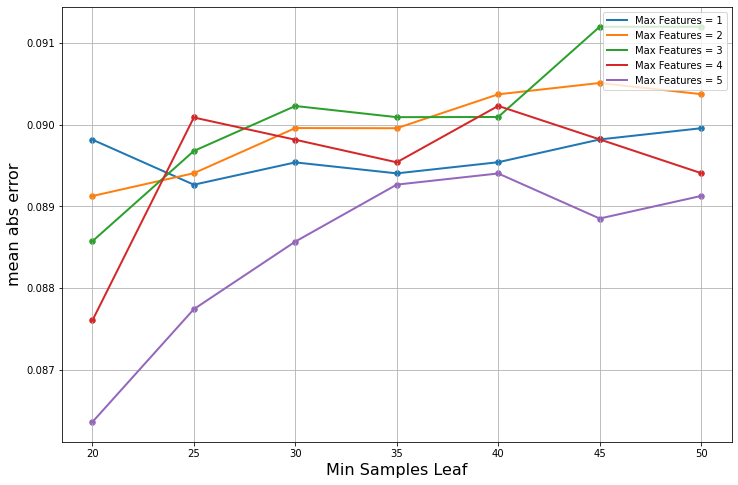

In [138]:
n_estimators = rf_cv_reg.cv_results_['param_min_samples_leaf'].data
R2_scores = -rf_cv_reg.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('mean abs error', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='upper right')
plt.show()

In [139]:
grid_values = {'max_features': np.linspace(4,8,5, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': np.linspace(15,25,11, dtype='int32'),
               'n_estimators': [500],
               'random_state': [404]}

rf_reg = RandomForestClassifier() 
rf_cv_reg = GridSearchCV(rf_multi, param_grid=grid_values, scoring='neg_mean_absolute_error',
                           cv=5)
rf_cv_reg.fit(X_train, y_train_multi)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=1,
                                              min_samples_leaf=20,
                                              n_estimators=500,
                                              random_state=404),
             param_grid={'max_depth': [20],
                         'max_features': array([4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
                         'n_estimators': [500], 'random_state': [404]},
             scoring='neg_mean_absolute_error')

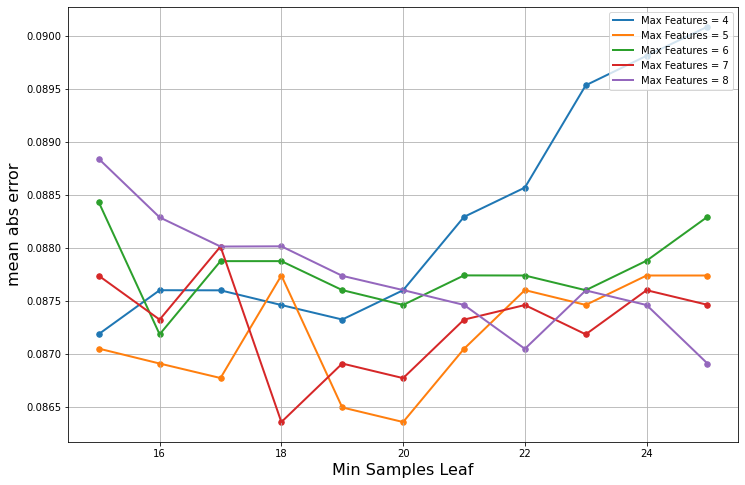

In [140]:
n_estimators = rf_cv_reg.cv_results_['param_min_samples_leaf'].data
R2_scores = -rf_cv_reg.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('Min Samples Leaf', fontsize=16)
plt.ylabel('mean abs error', fontsize=16)
plt.grid(True, which='both')

M = len(grid_values['min_samples_leaf'])
N = len(grid_values['max_features'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='Max Features = '+str(grid_values['max_features'][i]))
plt.legend(loc='upper right')
plt.show()

In [181]:
rf_regression = RandomForestRegressor(random_state = 404, n_estimators = 500, max_features = 7, max_depth = 20)
rf_regression.fit(X_train_orig, train['overall_ratings'])

RandomForestRegressor(max_depth=20, max_features=7, n_estimators=500,
                      random_state=404)

In [270]:
y_pred = rf_regression.predict(Xtest)

In [271]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [272]:
OSR2(rf_regression, Xtest, test['overall_ratings'], train['overall_ratings'])

0.007201336832704519

In [273]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['overall_ratings'], y_pred)
mae = mean_absolute_error(test['overall_ratings'], y_pred)
print('mean squared error:', mse)
print('mean abosolute error:', mae)

mean squared error: 0.20498882687987072
mean abosolute error: 0.3325283444422524


In [280]:
def convert_to_bins(results):
    predict = np.zeros((len(results), 11))
    bins = (results/.5).round()
    for i,j in enumerate(bins):
        predict[i, int(j)] = 1
    return predict

def binary(results):
    bins = (results/.5).round()/2
    return (bins>4).astype(int)

In [281]:
converted = convert_to_bins(y_pred)

In [282]:
print ("\nAccuracy:", accuracy_score(y_multitest, converted))


Accuracy: 0.5042372881355932


In [283]:
binary_conversion = binary(y_pred)

In [284]:
cm = confusion_matrix(ytest, binary_conversion)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, binary_conversion))

Confusion Matrix: 
 [[80 40]
 [51 65]]

Accuracy: 0.614406779661017


Min sample leafs in this case for regression makes the estimate worse.

# Boosting CART

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [225]:
grid_values={'ccp_alpha': np.linspace(0,0.1,201)}
dtr=DecisionTreeRegressor(min_samples_split=20,random_state=88)
dtr_cv=GridSearchCV(dtr, param_grid=grid_values, scoring='neg_mean_absolute_error',
                    cv=5,verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring='neg_mean_absolute_e

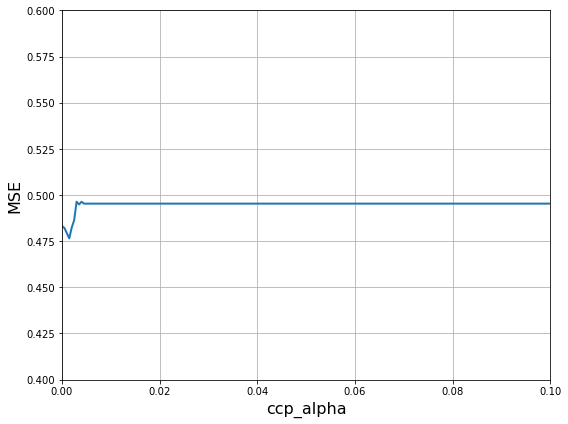

In [226]:
ccp_alpha=dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores=-dtr_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8,6))
plt.xlabel('ccp_alpha',fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.plot(ccp_alpha, R2_scores, linewidth=2)
plt.grid(True, which='both')
plt.xlim([0,0.1])
plt.ylim([0.4,.6])
plt.tight_layout()
plt.show()

In [227]:
dtr_cv.cv_results_['param_ccp_alpha'][np.argmax(dtr_cv.cv_results_['mean_test_score'])]

0.0015

In [285]:
DR = DecisionTreeRegressor(ccp_alpha = 0.0015, min_samples_leaf=5, min_samples_split=20,
                           random_state=88).fit(X_train_orig, train['overall_ratings'])
y_pred = DR.predict(Xtest)

In [286]:
mse = mean_squared_error(test['overall_ratings'], y_pred)
mae = mean_absolute_error(test['overall_ratings'], y_pred)
print('mean squared error:', mse)
print('mean abosolute error:', mae)

mean squared error: 0.19594742608521923
mean abosolute error: 0.3435495440396134


In [287]:
converted = convert_to_bins(y_pred)

In [288]:
print ("\nAccuracy:", accuracy_score(y_multitest, converted))


Accuracy: 0.4533898305084746


In [289]:
binary_conversion = binary(y_pred)

In [290]:
cm = confusion_matrix(ytest, binary_conversion)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, binary_conversion))

Confusion Matrix: 
 [[80 40]
 [62 54]]

Accuracy: 0.5677966101694916


In [240]:
import time
from sklearn.ensemble import GradientBoostingRegressor

In [241]:
grid_values = {'n_estimators': np.logspace(9, 16, num=8, base=2, dtype='int32'),
               'learning_rate': [0.005],
               'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]}

tic = time.time()

gbr2 = GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr2, param_grid=grid_values, scoring='neg_mean_absolute_error', cv=5)
gbr_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 3844.12 s


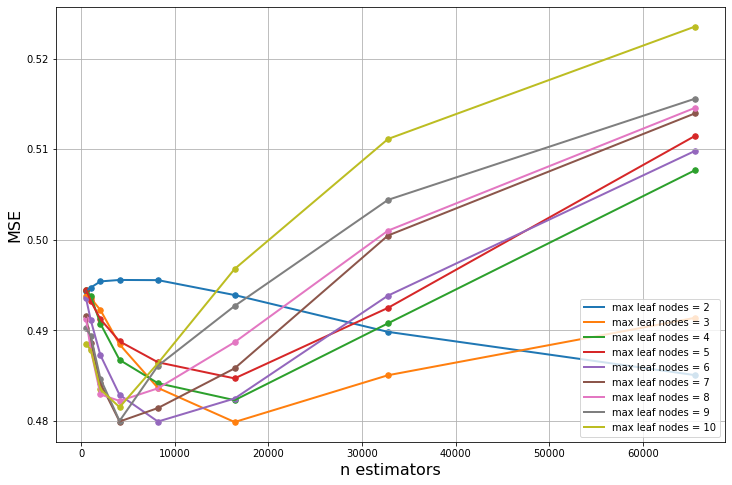

In [242]:
n_estimators = gbr_cv.cv_results_['param_n_estimators'].data
R2_scores = -gbr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], R2_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [291]:
gbr = GradientBoostingRegressor(n_estimators = 4096, learning_rate = .005, max_leaf_nodes = 7,
                               max_depth = 100, random_state = 88)
gbr.fit(X_train_orig, train['overall_ratings'])

GradientBoostingRegressor(learning_rate=0.005, max_depth=100, max_leaf_nodes=7,
                          n_estimators=4096, random_state=88)

In [292]:
y_pred = gbr.predict(Xtest)

In [293]:
mse = mean_squared_error(test['overall_ratings'], y_pred)
mae = mean_absolute_error(test['overall_ratings'], y_pred)
print('mean squared error:', mse)
print('mean abosolute error:', mae)

mean squared error: 0.2117266640565602
mean abosolute error: 0.3453775540219188


In [294]:
converted = convert_to_bins(y_pred)

In [295]:
print ("\nAccuracy:", accuracy_score(y_multitest, converted))


Accuracy: 0.4745762711864407


In [296]:
binary_conversion = binary(y_pred)

In [297]:
cm = confusion_matrix(ytest, binary_conversion)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, binary_conversion))

Confusion Matrix: 
 [[80 40]
 [53 63]]

Accuracy: 0.6059322033898306
